In [1]:
import os
import sys
import importlib
from unlabeled_extrapolation.datasets import celeba
import numpy as np
import pandas
from functools import partial
importlib.reload(celeba)

<module 'unlabeled_extrapolation.datasets.celeba' from '/juice/scr/ananya/cifar_experiments/unlabeled_extrapolation/unlabeled_extrapolation/datasets/celeba.py'>

In [2]:
# # Make a pickle file out of the celeba examples (commented out).
# celeba.celeba_to_pickle('/u/scr/ananya/celeba_pickle/celeba_full_pickle')

In [8]:
# Our celeba dataset lets us split the dataset into subgroups, e.g., to ensemble.
# Test splitting into subgroups (e.g., subgroups are roughly equally sized, have random looking indices).
# for i in range(10):
#     data = celeba.CelebA(target_attribute='Male', split='train', supergroup_n=105, num_subgroups=10, subgroup_idx=i, verbose=True)
data = celeba.CelebA(target_attribute='Male', split='test', verbose=True)

In [10]:
print(len(data))

19962


tensor([0.])
(218, 178, 3)


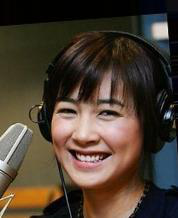

In [29]:
index = 50016
print(data[index][1])
print(np.array(data[index][0]).shape)
data[index][0]
# data._images

In [4]:
# Get attribute statistics, for example what proportion of the examples have bald people.
attr = data._attr.numpy()
proportions = np.mean(attr, axis=0)
props_names = list(zip(np.minimum(1.0 - proportions, proportions), proportions, celeba.attribute_names))
[(b, c) for a, b, c in sorted(props_names)]

[(0.022811328868956197, 'Bald'),
 (0.040806045340050376, 'Mustache'),
 (0.04236652945874547, 'Gray_Hair'),
 (0.04303618602936659, 'Pale_Skin'),
 (0.04651348528598636, 'Double_Chin'),
 (0.04938870799287338, 'Wearing_Hat'),
 (0.05137310315168643, 'Blurry'),
 (0.05625115193217423, 'Sideburns'),
 (0.05768261964735517, 'Chubby'),
 (0.06350678872028015, 'Goatee'),
 (0.0646372181605947, 'Eyeglasses'),
 (0.06466179271364501, 'Rosy_Cheeks'),
 (0.07304785894206549, 'Wearing_Necktie'),
 (0.08011304294403146, 'Receding_Hairline'),
 (0.11167291269890028, '5_o_Clock_Shadow'),
 (0.11592431037660503, 'Narrow_Eyes'),
 (0.12142286662161332, 'Wearing_Necklace'),
 (0.1436751244086748, 'Bushy_Eyebrows'),
 (0.149087669718007, 'Blond_Hair'),
 (0.15165571051176507, 'Bangs'),
 (0.8341770596547275, 'No_Beard'),
 (0.18653314492842663, 'Wearing_Earrings'),
 (0.20391964121152548, 'Brown_Hair'),
 (0.20446028137863242, 'Bags_Under_Eyes'),
 (0.2085580880997727, 'Straight_Hair'),
 (0.7789396080358788, 'Young'),
 (0.23

In [61]:
predict_attributes = ['Wearing_Earrings', 'Wearing_Necklace', 'Wearing_Necktie', 'Eyeglasses']
group_attributes = ['No_Beard', 'Black_Hair', 'Brown_Hair', 'Blond_Hair', 'Gray_Hair', 'Bald']

def make_intersectional_table(attr_values, predict_attrs, group_attrs):
    line = 'Counts'
    for predict_attr in predict_attrs:
        line += '\t' + predict_attr
        predict_attr_idx = celeba.attr_name_to_idx[predict_attr]
        print(np.sum(attr_values[:, predict_attr_idx] == 1))
    print(line)
    for group_attr in group_attrs:
        group_attr_idx = celeba.attr_name_to_idx[group_attr]
        line = group_attr
        for predict_attr in predict_attrs:
            predict_attr_idx = celeba.attr_name_to_idx[predict_attr]
            intersection_count = np.sum(
                np.logical_and(attr_values[:, group_attr_idx] == 1, attr_values[:, predict_attr_idx] == 1))
            line += '\t' + '{:d}'.format(intersection_count)
        print(line)
        
make_intersectional_table(val_attrs, predict_attributes, group_attributes)

3789
2396
1443
1383
Counts	Wearing_Earrings	Wearing_Necklace	Wearing_Necktie	Eyeglasses
No_Beard	3725	2312	934	930
Black_Hair	686	349	386	250
Brown_Hair	941	576	148	149
Blond_Hair	851	662	21	52
Gray_Hair	122	79	365	262
Bald	12	11	170	128


In [62]:
# Save attributes table and map from attribute name to index.
import pickle
fn = partial(os.path.join, celeba.JUICE_CELEBA_ROOT)
all_attrs = pandas.read_csv(fn("list_attr_celeba.txt"), delim_whitespace=True, header=1)
all_attrs = (all_attrs.values + 1) // 2
train_attrs = all_attrs[celeba_splits[1] == 0]
val_attrs = all_attrs[celeba_splits[1] == 1]
test_attrs = all_attrs[celeba_splits[1] == 2]
pickle.dump((train_attrs, val_attrs, test_attrs, celeba.attr_name_to_idx), open("../logs/celeba/attribute_values.pkl", "wb"))

numpy.ndarray

In [6]:
# Get the celeba_splits so we can look at how many train, val, test examples there are.
JUICE_CELEBA_ROOT = '/juice/scr/ananya/celeba'
fn = partial(os.path.join, JUICE_CELEBA_ROOT)
celeba_splits = pandas.read_csv(
            fn("list_eval_partition.txt"), delim_whitespace=True, header=None, index_col=0)
np.sum(celeba_splits[1] == 0)

162770